In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go

In [2]:
athlete_events = pd.read_csv("athlete_events.csv")
noc_regions = pd.read_csv("noc_regions.csv")

In [3]:
data = pd.merge(athlete_events, noc_regions, on = 'NOC', how = 'left')

#### Problem 1:Turkey Medals Over the Years

In [4]:
TurkeyMedals = (data[(data.region == 'Turkey') & 
                    ((data.Medal == 'Gold') | 
                     (data.Medal == 'Silver')|
                     (data.Medal == 'Bronze'))].loc[:,["Year","Medal"]])
#TurkeyMedals

Text(0.5, 1.0, 'Turkey Medals Over the Years')

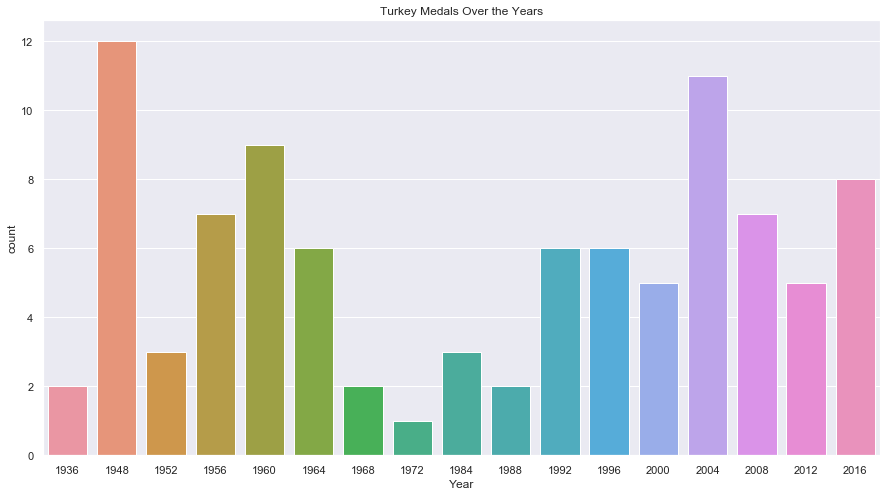

In [5]:
sns.set(style="darkgrid")
plt.figure(figsize=(15, 8))
sns.countplot(x='Year', data=TurkeyMedals)
plt.title('Turkey Medals Over the Years')

If we want to see the medals in details:

#### Problem 2: Age Distribution of Swimming, Football & Basketball Gold Medalists

In [6]:
SwimmingGoldMedals = data[(data.Medal == 'Gold')&(data.Sport == 'Swimming')]
FootballGoldMedals = data[(data.Medal == 'Gold')&(data.Sport == 'Football')]
BasketballGoldMedals = data[(data.Medal == 'Gold')&(data.Sport == 'Basketball')]

#exclude NaN ages
SwimmingGoldMedals = SwimmingGoldMedals[np.isfinite(SwimmingGoldMedals['Age'])]
FootballGoldMedals = FootballGoldMedals[np.isfinite(FootballGoldMedals['Age'])]
BasketballGoldMedals = BasketballGoldMedals[np.isfinite(BasketballGoldMedals['Age'])]
#SwimmingGoldMedals


Text(0.5, 1.0, 'Age Distribution of Swimming, Football & Basketball Gold Medalists')

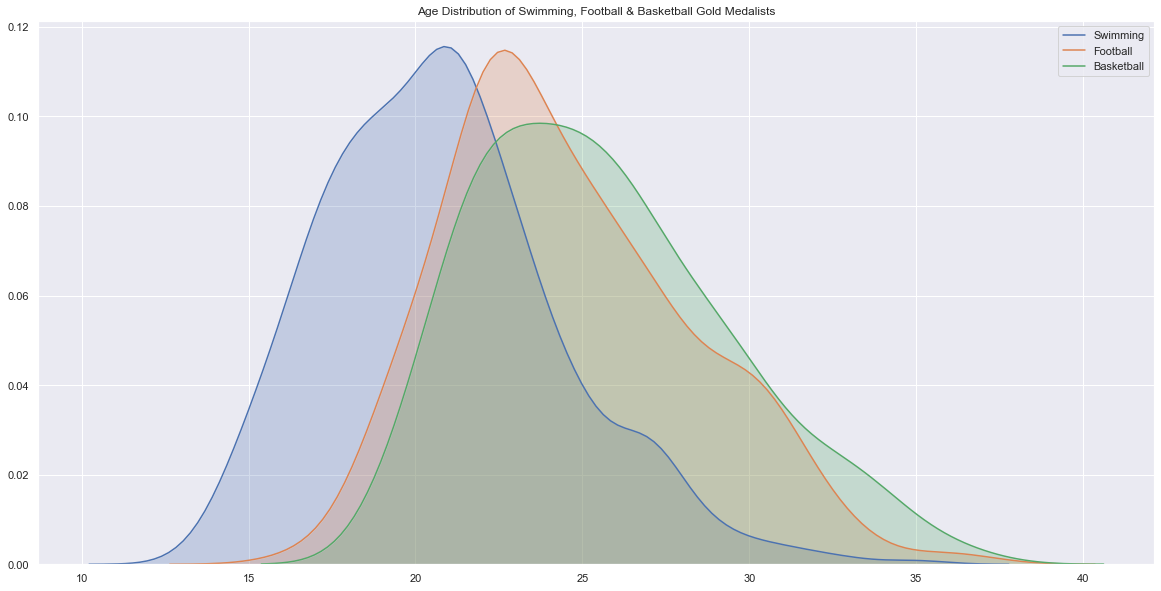

In [7]:
plt.figure(figsize=(20, 10))
sns.kdeplot(data=SwimmingGoldMedals['Age'],label='Swimming', shade=True)
sns.kdeplot(data=FootballGoldMedals['Age'],label='Football', shade=True)
sns.kdeplot(data=BasketballGoldMedals['Age'],label='Basketball', shade=True)

plt.title('Age Distribution of Swimming, Football & Basketball Gold Medalists')

#### Problem 3: Height vs Weight of Olympic Medalists

In [8]:
notNullMedals = data[data['Medal'].notnull()]
#notNullMedals

In [9]:
notNullHeightWeight = notNullMedals[(notNullMedals['Height'].notnull()) & (notNullMedals['Weight'].notnull())]
#notNullHeightWeight

Text(0.5, 1.0, 'Height vs Weight of Olympic Medalists')

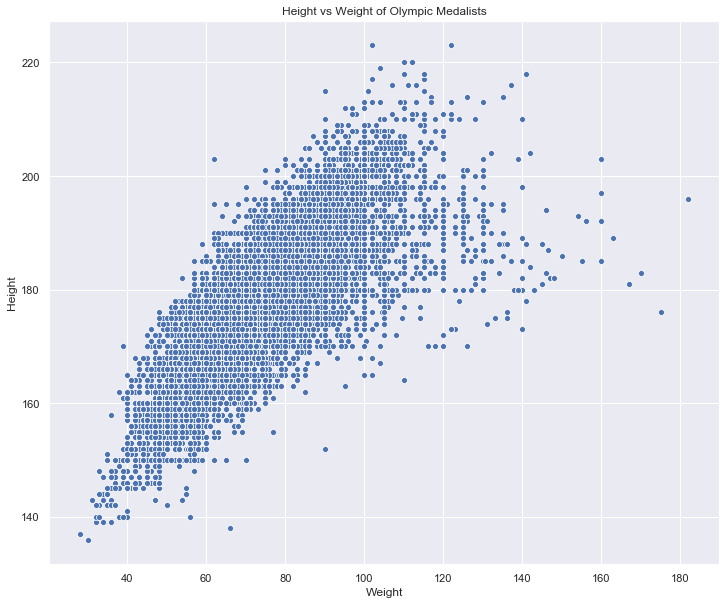

In [10]:
plt.figure(figsize=(12, 10))
ax = sns.scatterplot(x="Weight", y="Height", data=notNullHeightWeight)
plt.title('Height vs Weight of Olympic Medalists')

#### Problem 4: Countries participation at Summer Olympic Games

In [11]:
countries_participated = data[data.Season=="Summer"].groupby(["Year"])\
["NOC"].value_counts().reset_index(name='Count').sort_values(["Year"])
#countries_participated.head()

Text(0.5, 1.0, 'Countries participation at Summer Olympic Game')

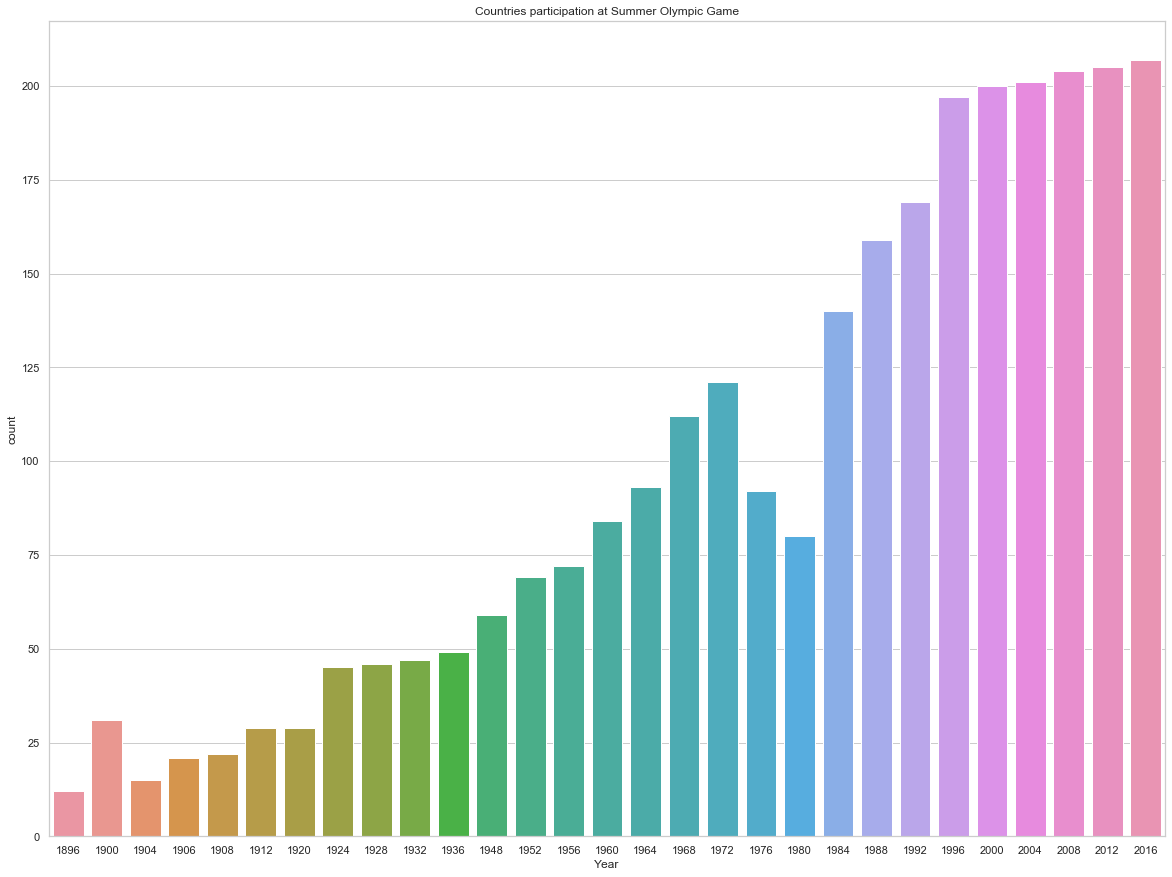

In [12]:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 15))
sns.countplot('Year', data=countries_participated)
plt.title("Countries participation at Summer Olympic Game")

#### Problem 5: Summer and Winter Sports over the years

In [13]:
summer_events = data[data.Season=="Summer"]
winter_events = data[data.Season=='Winter']

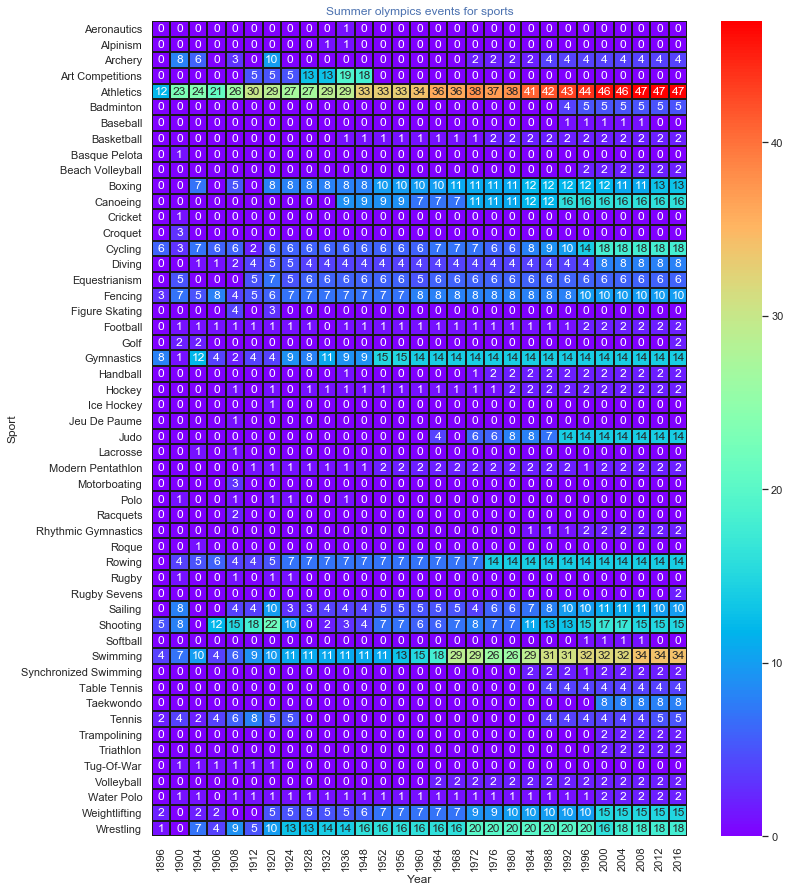

In [14]:
summer_sports = pd.pivot_table(index="Sport",columns="Year",data=summer_events,
                        values="Event",aggfunc="nunique")
summer_sports = summer_sports.fillna(0)
plt.figure(figsize=(12,15))
sns.heatmap(summer_sports,linewidth=1,annot=True,cmap="rainbow",linecolor="k")
plt.title("Summer olympics events for sports",color="b")
plt.show()

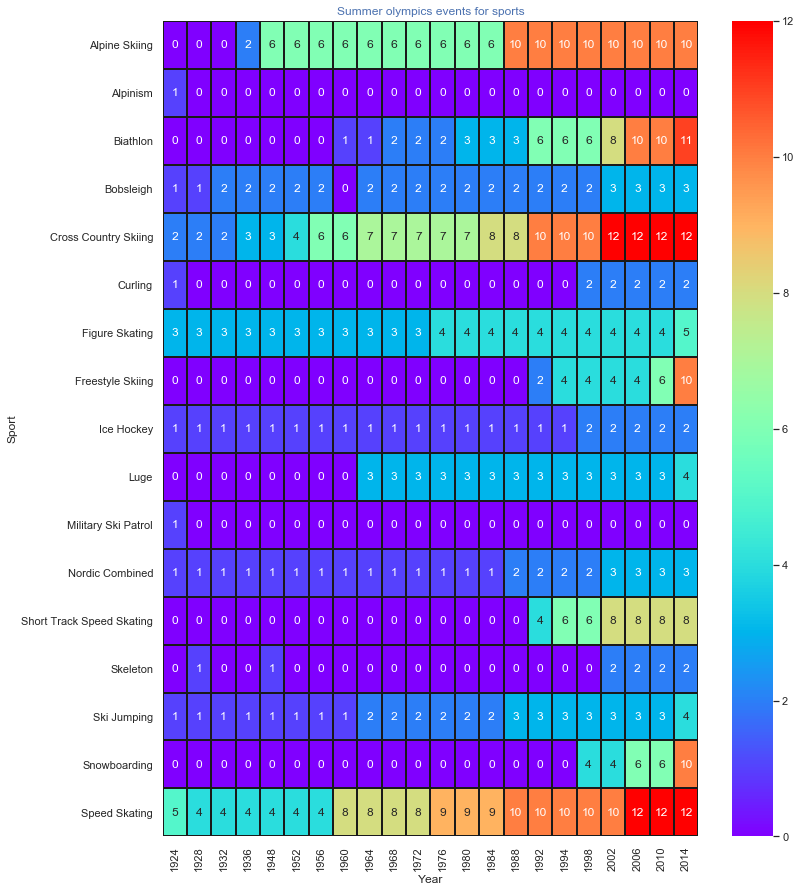

In [15]:
winter_sports = pd.pivot_table(index="Sport",columns="Year",data=winter_events,
                        values="Event",aggfunc="nunique")
winter_sports = winter_sports.fillna(0)
plt.figure(figsize=(12,15))
sns.heatmap(winter_sports,linewidth=1,annot=True,cmap="rainbow",linecolor="k")
plt.title("Summer olympics events for sports",color="b")
plt.show()

#### Problem 6: Top 10 countries with total medals in Summer Olympic games

In [16]:
top10Countries_Summer = data[(data['Season']=='Summer') & (data['Medal']!='No Medal')].groupby('region').count().reset_index()[['region','Medal']].sort_values('Medal', ascending=False).head(10)

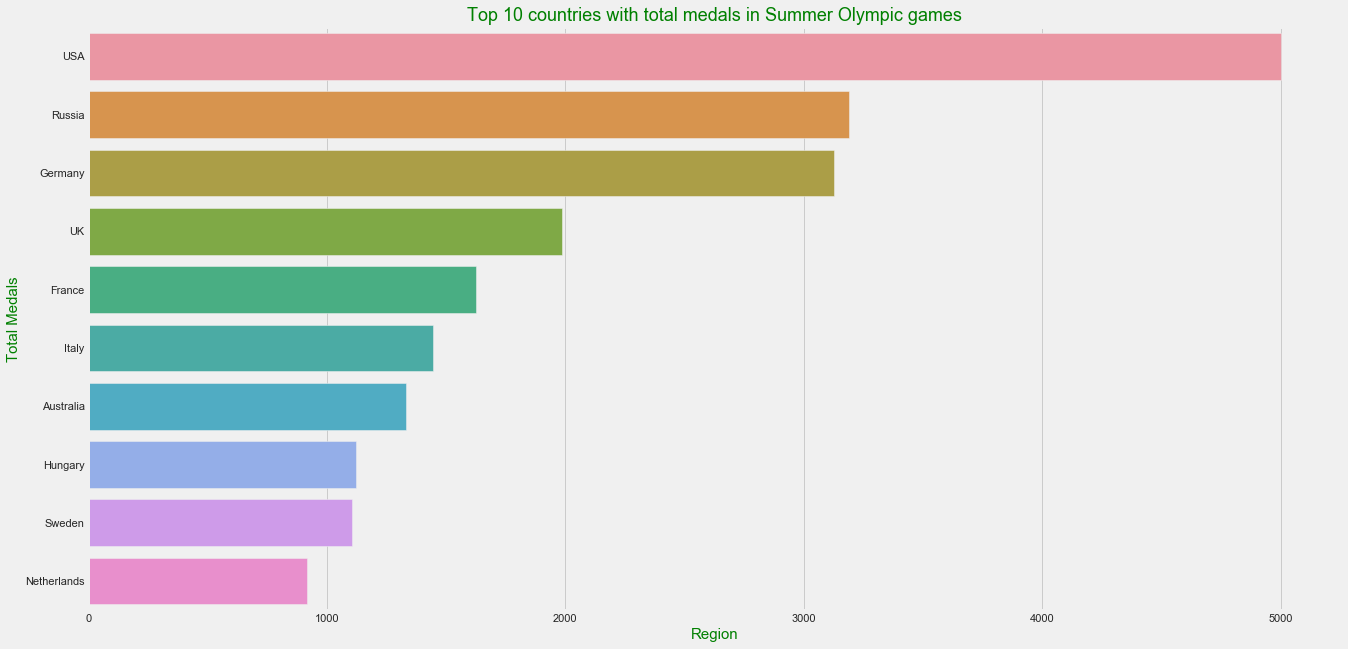

In [17]:
plt.style.use('fivethirtyeight')
f, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x="Medal", y="region", data=top10Countries_Summer, label="region")
ax.set_xlabel('Region', size=15, color="green")
ax.set_ylabel('Total Medals', size=15, color="green")
ax.set_title('Top 10 countries with total medals in Summer Olympic games', size=18, color="green")
plt.show()

#### Problem 7: Age distribution in Summer Olympic games

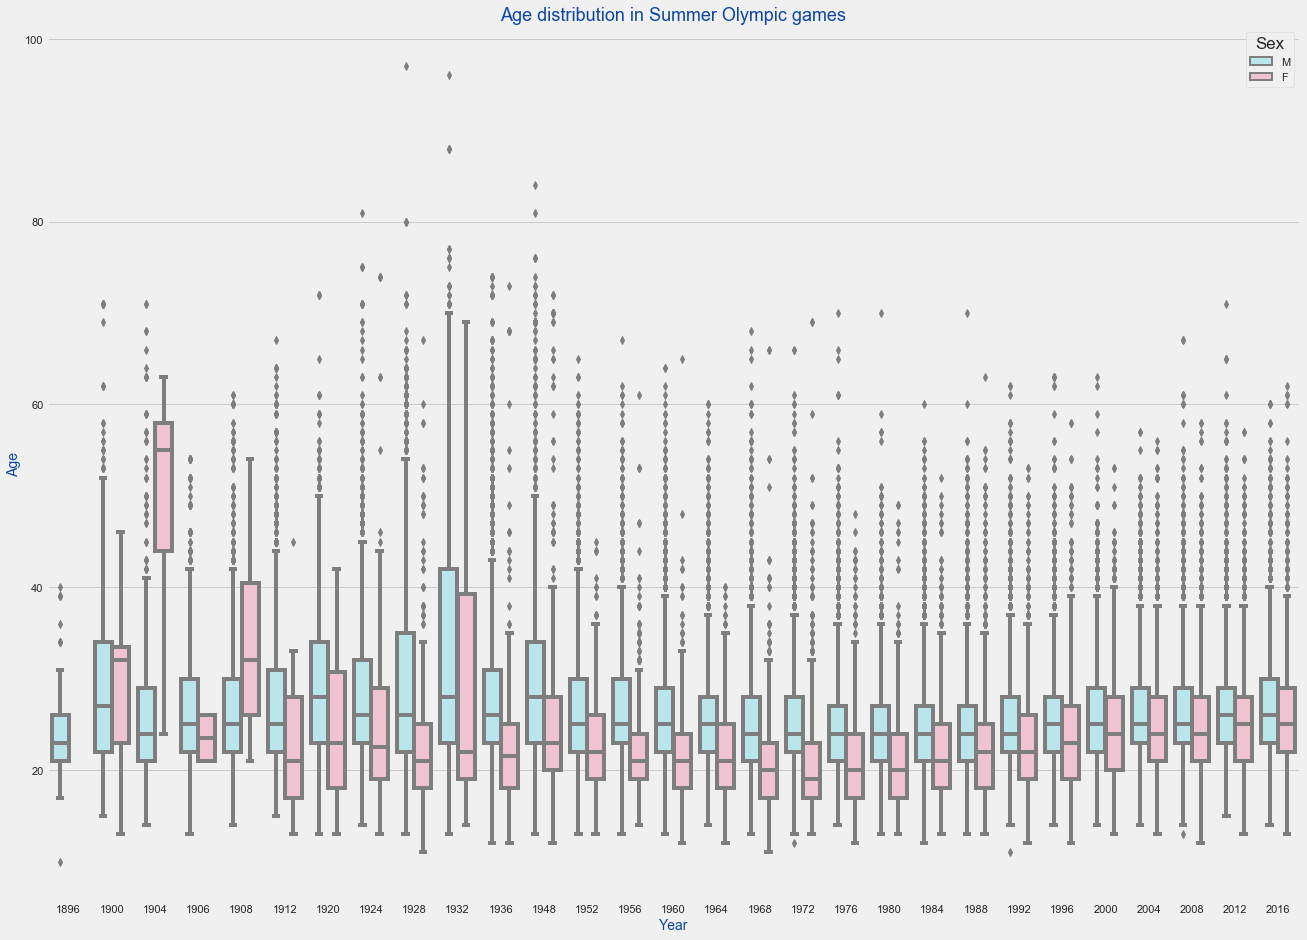

In [18]:
fig, ax = plt.subplots(figsize=(20,15))
a = sns.boxplot(x="Year", y="Age", hue="Sex", palette={"M": "#B2EBF2", "F":"#F8BBD0"}, data=data[data['Season']=='Summer'], ax=ax)
        
ax.set_xlabel('Year', size=14, color="#0D47A1")
ax.set_ylabel('Age', size=14, color="#0D47A1")
ax.set_title('Age distribution in Summer Olympic games', size=18, color="#0D47A1")
plt.show()

#### Problem 8: Events by gender over the overs

In [19]:
summer = data[data.Season == 'Summer']
summer_years = data.groupby(["Year","Sex"])["Event"].nunique().reset_index()

winter = data[data.Season == 'Winter']
winter_years = winter.groupby(["Year","Sex"])["Event"].nunique().reset_index()

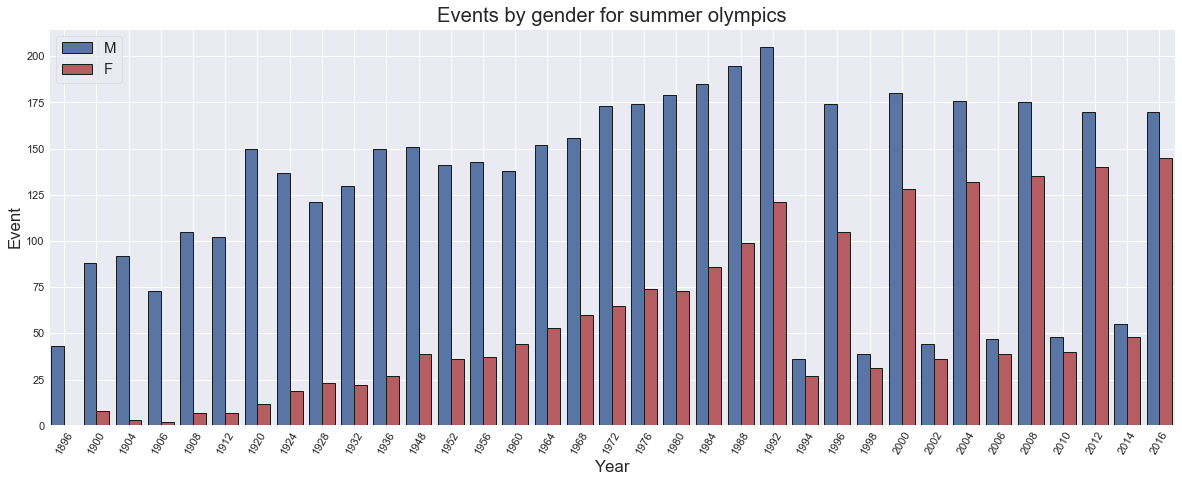

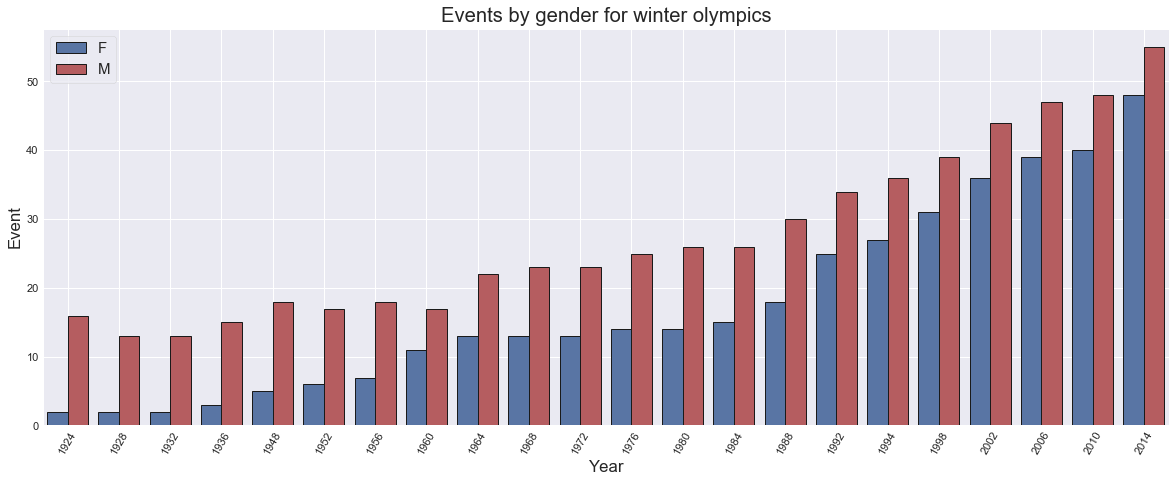

In [20]:
sns.set_style("darkgrid")

plt.figure(figsize=(18,15))
plt.subplot(211)
sns.barplot("Year","Event",
            data=summer_years,hue="Sex",
            linewidth = 1,palette = ["b","r"],
            edgecolor = "k"*summer_years["Year"].nunique()
           )
plt.xticks(rotation = 60)
plt.grid(True)
plt.legend(loc = "upper left",prop = {"size" : 15})
plt.title("Events by gender for summer olympics")

plt.figure(figsize=(18,15))
plt.subplot(212)
sns.barplot("Year","Event",
            data=winter_years,hue="Sex",
            linewidth = 1,palette = ["b","r"],
            edgecolor = "k"*winter_years["Year"].nunique()
           )
plt.xticks(rotation = 60)
plt.grid(True)
plt.legend(loc = "upper left",prop = {"size" : 15})
plt.title("Events by gender for winter olympics")

plt.show()

#### Problem 9: Men vs Women athletes in Summer Olympics over the years

In [21]:
men_athletes_Summ  = data[(data.Sex == 'M') & (data.Season == 'Summer')]
women_athletes_Summ  = data[(data.Sex == 'F') & (data.Season == 'Summer')]

Text(0.5, 1.0, 'Men vs Women athletes in Summer Olympics over the years')

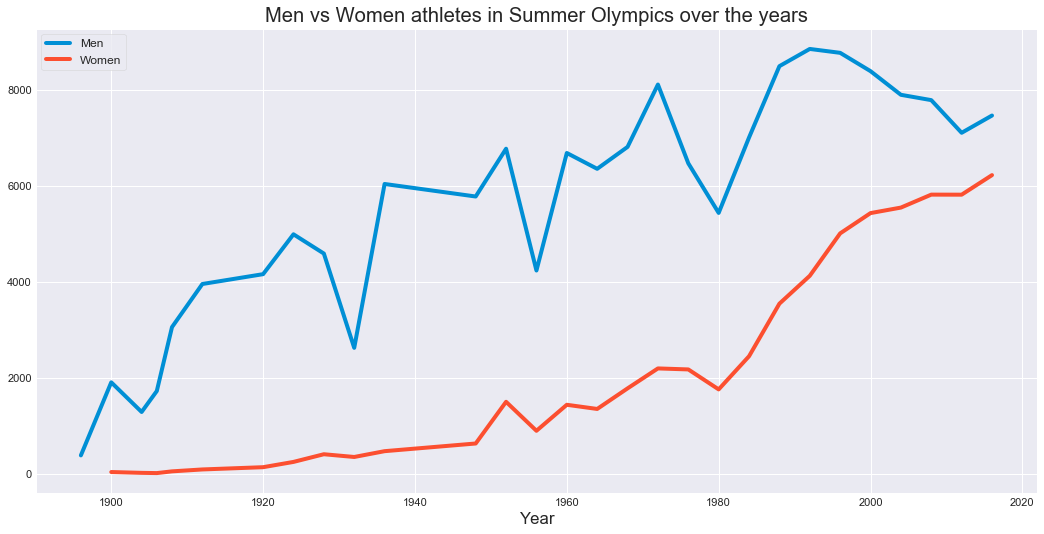

In [22]:
men_athletes_Summ.groupby('Year').ID.count().plot.line(label='Men', figsize=(16,8))
women_athletes_Summ.groupby('Year').ID.count().plot.line(label='Women', figsize=(16,8))
plt.legend(loc='upper left', fontsize=12)
plt.title('Men vs Women athletes in Summer Olympics over the years')



#### Problem 10: Men vs Women athletes in Winter Olympics over the years

In [23]:
men_athletes_Win = data[(data.Sex == 'M') & (data.Season == 'Winter')]
women_athletes_Win  = data[(data.Sex == 'F') & (data.Season == 'Winter')]

Text(0.5, 1.0, 'Men vs Women athletes in Winter Olympics over the years')

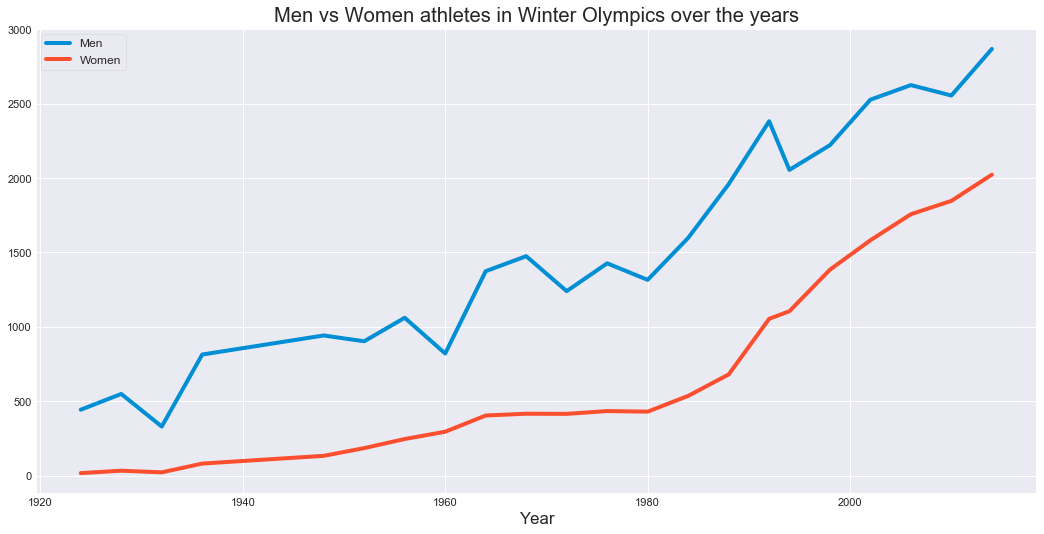

In [24]:
men_athletes_Win.groupby('Year').ID.count().plot.line(label='Men', figsize=(16,8))
women_athletes_Win.groupby('Year').ID.count().plot.line(label='Women', figsize=(16,8))
plt.legend(loc='upper left', fontsize=12)
plt.title('Men vs Women athletes in Winter Olympics over the years')
